# Aufgabe 1: Business Understanding

## Ziele:

1.   Vorhersage des Verkaufspreises
2.   Maximierung des Gewinns durch gezieltes Renovieren
3.   Vorhersage des besten Verkaufsmonats

-----------------------
Investoren erwarten eine möglichst großen Gewinn für ihr Geld, das sie investieren. Wichtige Ziele sind daher die oben genannten drei. Der Verkaufspreis eines Hauses soll vorhergesagt werden können, dazu sollen Zusammenhänge zwischen den Haus-"Attributen" und dem Hauspreis herausgefunden werden, sodass durch gezieltes Renovieren das Geld effizient eingesetzt werden kann. Zum Beispiel könnte es in gewissen Stadtteilen wichtiger sein, eine Klimaanlage zu besitzen, als den Pool zu renobieren.
Außerdem könnte es Unterschiede vom Verkaufspreis zum Verkaufsmonat geben. Um den Gewinn zu maximieren ist es auch hier sinnvoll den Monat herauszufinden, zu dem günstig eingekauft und teuer verkauft werden kann, so kännen unsere Kunden/Investoren ihren Gewinn maximieren.

# Aufgabe 2: Data Exploration und Analyse

In [1]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

In [2]:
#import Pandas
import pandas as pd

In [3]:
# dataset = pd.read_csv('/content/drive/My Drive/Datascience/DatenAusgegeben1.0.csv', delimiter=';')
# Datensatz einlesen
dataset = pd.read_csv('./DatenAusgegeben1.1.csv', delimiter=';')
dataset #EInlesen testen


,Grundstück in qm,Grundstücksform,Steigung,Bezirk,Zone,Lage,Typ,Zustand,Gebaut,Renoviert,...,Schlafzimmer,Küchen,Küchenqualität,Räume,Garage Typ,Garagenkapazität,Pool,Verkaufsmonat,Verkaufsjahr,Preis
0,898,IR1,Nein,Somerset,RL,Norm,2Fam,4,2107,2107,...,6,2,3,10,Anbau,2,NaN,8,2136,156500
1,1326,Reg,Nein,North East,RL,Norm,1Fam,5,2133,2133,...,3,1,4,7,Anbau,3,NaN,1,2137,350000
2,725,Reg,Nein,Somerset,RL,Norm,1Fam,7,2096,2138,...,3,1,4,5,Freistehend,1,NaN,6,2140,137900
3,725,Reg,Nein,Somerset West,RL,Norm,1Fam,5,2135,2135,...,3,1,4,8,Anbau,2,NaN,4,2136,184000
4,697,Reg,Nein,Miller,RL,Norm,1Fam,5,2129,2129,...,3,1,4,7,Anbau,2,NaN,6,2140,189000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1272,IR1,Nein,North East,RL,Norm,1Fam,5,2133,2134,...,3,1,5,10,Eingebaut,3,NaN,3,2138,412500
1996,941,IR1,Nein,Miller,RL,Norm,1Fam,5,2134,2134,...,3,1,4,7,Anbau,2,NaN,7,2139,195500
1997,1093,Reg,Nein,Grand Park,RL,Norm,1Fam,7,2040,2130,...,2,1,3,6,Freistehend,1,NaN,5,2137,112000
1998,1228,IR1,Nein,North East,RL,Norm,1Fam,5,2134,2134,...,3,1,4,9,Eingebaut,3,NaN,2,2136,279000


In [4]:
#Import seaborn und pyplot
import seaborn as sb
import matplotlib.pyplot as plt

#sb.pairplot(data = dataset)

Grundstück in qm


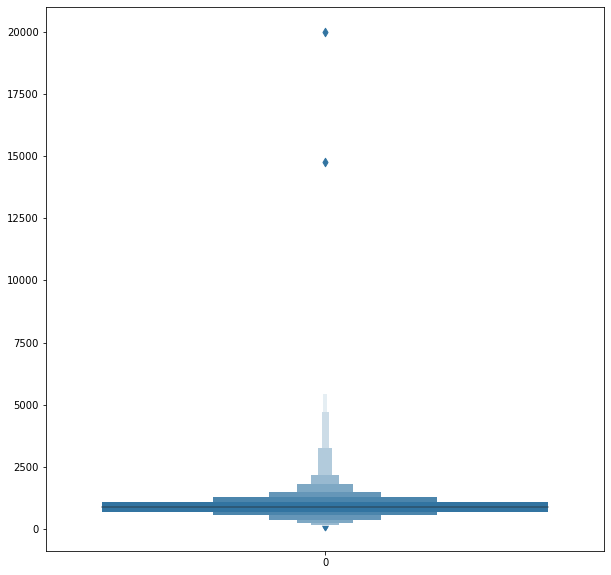

Zustand


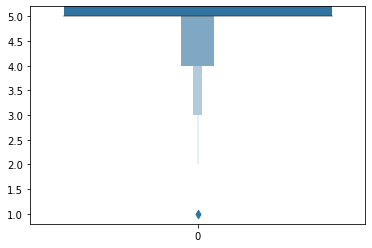

Gebaut


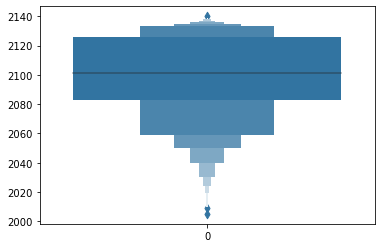

Renoviert


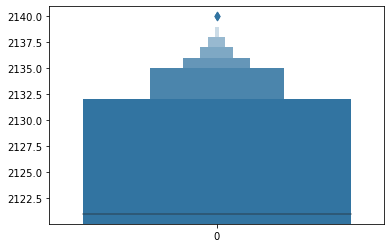

Zustand Fassade


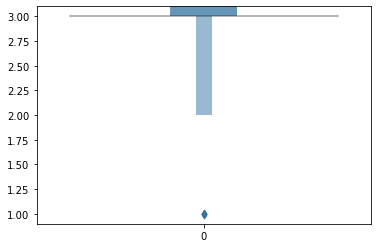

Kellerfläche in qm


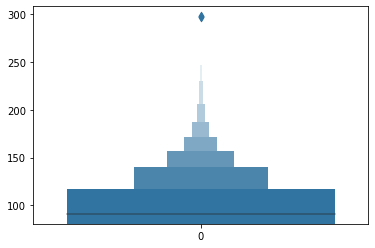

Erster Stock in qm


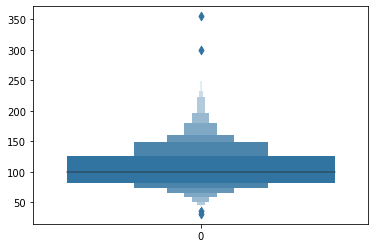

Zweiter Stock in qm


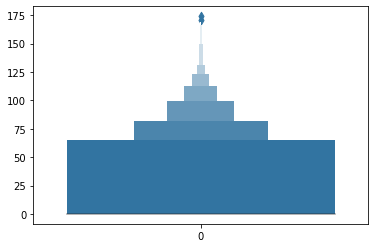

Wohnfläche in qm


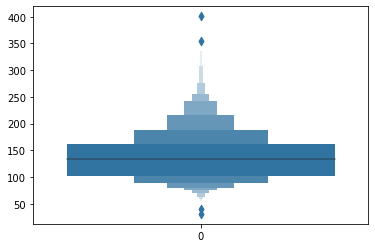

Schlafzimmer


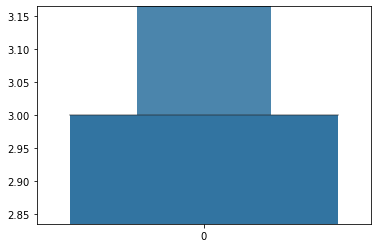

Küchen


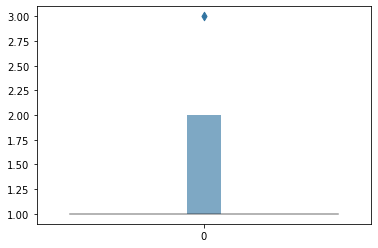

Küchenqualität


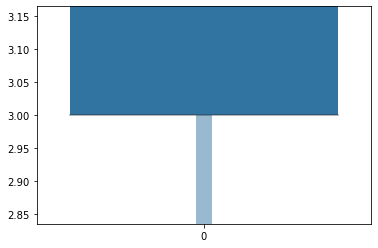

Räume


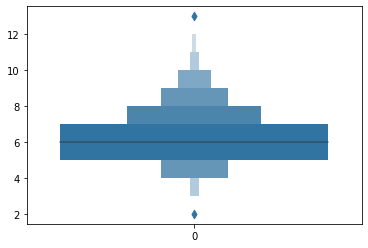

Garagenkapazität


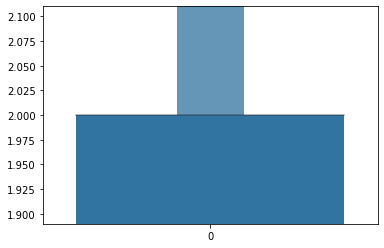

Verkaufsmonat


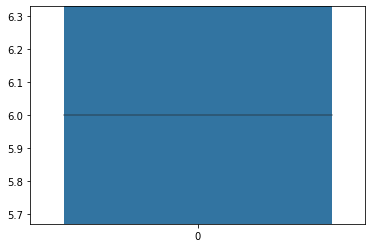

Verkaufsjahr


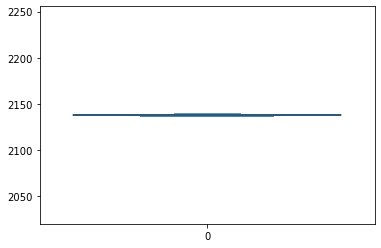

Preis


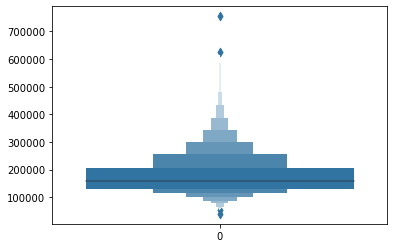

In [5]:
#dataset_noprice = dataset[dataset.columns.difference(['Preis', 'Grundstück in qm'])]
plt.figure(figsize = (10, 10))

#sb.boxplot(data = dataset_noprice)
columns = ['Grundstück in qm', 'Zustand', 'Gebaut',
           'Renoviert', 'Zustand Fassade', 'Kellerfläche in qm',
           'Erster Stock in qm', 'Zweiter Stock in qm', 'Wohnfläche in qm', 
           'Schlafzimmer', 'Küchen', 'Küchenqualität', 'Räume', 'Garagenkapazität',
           'Verkaufsmonat', 'Verkaufsjahr', 'Preis']
for column in columns:
  print(column)
  sb.boxenplot(data = dataset[column])
  plt.show()
  # pd.plotting.boxplot(data = dataset[[column]])

Zuerst müssen Anomalien im Datensatz gefunden werden, hierfür eigenen sich Box(plots sehr gut. Dabei können ähnliche Attribute (z.B Jahreszahlen, oder Flächenangaben) in eine Figur gezeichnet werden:

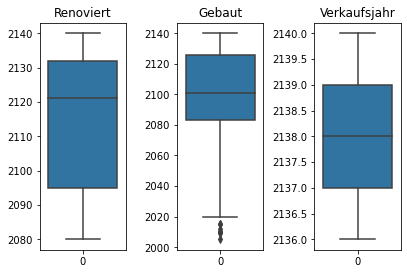

In [28]:
#Boxenplots für die Jahreszahlen
fig, axes = plt.subplots(1, 3)
plt.tight_layout(pad = 2)
axes[0].set_title('Renoviert')
axes[1].set_title('Gebaut')
axes[2].set_title('Verkaufsjahr')
sb.boxplot(data=dataset['Renoviert'], ax=axes[0])
sb.boxplot(data=dataset['Gebaut'], ax=axes[1])
sb.boxplot(data=dataset['Verkaufsjahr'], ax=axes[2])
plt.show()

#TODO: Anomalien beschreiben

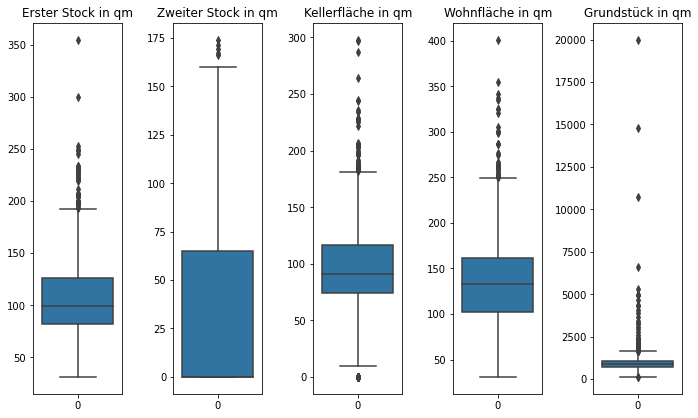

In [34]:
#Boxenplots für die Flächenangaben
fig, axes = plt.subplots(1, 5, figsize=(10,6))
plt.tight_layout(pad = 2)
axes[0].set_title('Erster Stock in qm')
axes[1].set_title('Zweiter Stock in qm')
axes[2].set_title('Kellerfläche in qm')
axes[3].set_title('Wohnfläche in qm')
axes[4].set_title('Grundstück in qm')
sb.boxplot(data=dataset['Erster Stock in qm'], ax=axes[0])
sb.boxplot(data=dataset['Zweiter Stock in qm'], ax=axes[1])
sb.boxplot(data=dataset['Kellerfläche in qm'], ax=axes[2])
sb.boxplot(data=dataset['Wohnfläche in qm'], ax=axes[3])
sb.boxplot(data=dataset['Grundstück in qm'], ax=axes[4])
plt.show()

TODO: Anomalien bschreiben

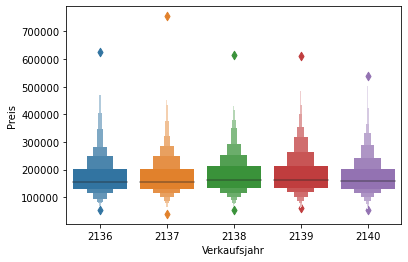

In [6]:
sb.boxenplot(data = dataset[['Verkaufsjahr', 'Preis']], x = 'Verkaufsjahr', y= 'Preis')
plt.show() # banane